In [1]:
%pip install git+https://github.com/InfectionMedicineProteomics/DPKS.git
%pip uninstall numpy -y
%pip install numpy==1.22
%pip install git+https://github.com/ErikHartman/pepnets.git

  Cloning https://github.com/InfectionMedicineProteomics/DPKS.git to /private/var/folders/64/ytcycnwx6w936vfxs5_7q3hm0000gn/T/pip-req-build-azbetplo
  Running command git clone -q https://github.com/InfectionMedicineProteomics/DPKS.git /private/var/folders/64/ytcycnwx6w936vfxs5_7q3hm0000gn/T/pip-req-build-azbetplo
  Resolved https://github.com/InfectionMedicineProteomics/DPKS.git to commit ef0b89c832dd2393be4a8a51ef367f692c13c397
  Using cached numpy-1.21.5-cp39-cp39-macosx_11_0_arm64.whl (12.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
You should consider upgrading via the '/Users/erikhartman/dev/peptide-biomarker/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Found existing installation: numpy 1.21.5
Uninstalling numpy-1.21.5:
  Successfully uninstalled numpy-1.21.5
Note: you may need to restart the 

In [2]:
import pandas as pd

# load the data from GitHub
data_matrix = pd.read_csv(
    "https://raw.githubusercontent.com/ErikHartman/pepnets/main/data/processed_datamatrix.csv"
)
design_matrix = pd.read_csv(
   "https://raw.githubusercontent.com/ErikHartman/pepnets/main/data/design.csv",
)


In [3]:
import dpks

qm = dpks.QuantMatrix(data_matrix, design_matrix)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
The dtype argument is deprecated and will be removed in late 2024.


In [4]:
qm = qm.quantify(method="top_n", top_n=3, summarization_method="mean", level="Cluster")
qm.to_df().head(3)

The dtype argument is deprecated and will be removed in late 2024.


,Cluster,Sample 1 Day 1,Sample 2 Day 1,Sample 3 Day 1,Sample 4 Day 1,Sample 5 Day 1,Sample 10 Day 1,Sample 11 Day 1,Sample 12 Day 1,Sample 13 Day 1,...,Sample 57 Day 2,Sample 66 Day 2,Sample 67 Day 2,Sample 68 Day 2,Sample 69 Day 2,Sample 70 Day 2,Sample 54 Day 3,Sample 55 Day 3,Sample 56 Day 3,Sample 57 Day 3
0,F1RX36_3,20.424298,20.291096,21.066490,19.924846,20.302939,20.489299,19.504888,19.637541,19.947148,...,20.660009,20.115967,19.975081,20.671527,20.165703,20.723081,19.705076,20.193552,20.542810,20.513704
1,F1RX36_20,13.227332,13.521671,16.083507,14.772915,18.933992,10.789121,12.874116,13.439640,13.463250,...,17.029369,14.065414,14.419316,15.900924,13.265286,17.011887,14.200649,17.278416,15.331399,15.411198
2,F1RX36_52,11.328454,15.682478,16.195472,14.259745,16.132277,13.141853,13.548360,14.058850,13.932196,...,15.318648,13.229145,14.195314,14.959774,12.894988,15.049122,14.123093,14.532555,13.700095,13.746245


In [5]:
qm.compare(method="linregress", comparisons=("S. aureus", "P. aeruginosa"), level="Cluster")
qm.to_df().sort_values("DEScore", ascending=False).head(10)

,Cluster,DEScore,GroupS. aureusMean,GroupP. aeruginosaMean,GroupS. aureusStdev,GroupP. aeruginosaStdev,Log2FoldChangeS. aureus-P. aeruginosa,PValuesS. aureus-P. aeruginosa,GroupS. aureusRepCounts,GroupP. aeruginosaRepCounts,...,Sample 57 Day 2,Sample 66 Day 2,Sample 67 Day 2,Sample 68 Day 2,Sample 69 Day 2,Sample 70 Day 2,Sample 54 Day 3,Sample 55 Day 3,Sample 56 Day 3,Sample 57 Day 3
18,HBA_1,1.299166,10.629613,17.706050,4.437594,1.446569,-7.076437,2.202584e-12,35,33,...,9.998527,1.179531,1.092563,6.160032,2.46852,5.913674,15.640266,16.614439,14.382615,12.455965
113,TYB4_5,1.238155,10.200766,16.325749,3.497319,1.923843,-6.124984,1.594199e-12,34,33,...,14.666817,3.625701,11.298703,12.097085,5.94215,12.423774,16.587234,17.080806,15.342213,14.526350
161,HMGN2_3,1.209882,4.665756,12.293693,4.256612,3.275445,-7.627936,3.831884e-10,25,33,...,13.063879,NaN,1.092563,0.984886,NaN,4.884574,14.258808,14.715798,11.351311,10.054412
83,PR39_17,1.171385,8.825952,15.216655,4.076605,2.134224,-6.390703,3.175546e-11,36,33,...,10.497998,10.543198,10.912745,13.754882,7.57844,13.856653,16.572230,15.536246,13.770178,14.223231
616,HPT_3,1.055967,6.359371,14.748760,3.529300,2.454891,-8.389389,9.957326e-05,2,33,...,NaN,NaN,NaN,NaN,NaN,NaN,15.803510,16.259492,13.604392,7.400468
19,HBA_0,1.026170,12.659435,5.563263,3.459077,2.990866,7.096172,1.398522e-07,23,16,...,3.081029,NaN,NaN,2.438153,NaN,6.718236,NaN,11.480229,NaN,8.339530
288,APOA1_18,1.019811,4.618595,11.508908,3.161899,3.442618,-6.890313,7.379903e-08,18,25,...,4.023888,NaN,NaN,2.320767,NaN,2.367546,10.213461,10.882356,NaN,NaN
6,F1RX36_53,1.009971,14.084744,16.608556,1.497018,0.881907,-2.523811,4.224287e-12,38,33,...,15.580236,13.421816,14.034124,14.612324,13.14091,14.419341,17.703164,17.463419,16.004447,14.562437
442,TYB10_3,1.000173,4.959095,12.196355,3.976895,3.587693,-7.237260,1.069452e-06,12,33,...,10.819015,NaN,NaN,0.984886,NaN,2.959384,11.389879,12.842893,11.191299,3.537136
504,G3P_32,0.929484,2.116015,9.738800,0.796650,3.892321,-7.622785,4.895545e-03,3,17,...,2.762660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.646928,3.547901


<Axes: xlabel='Log2FoldChangeS. aureus-P. aeruginosa', ylabel='LogP'>

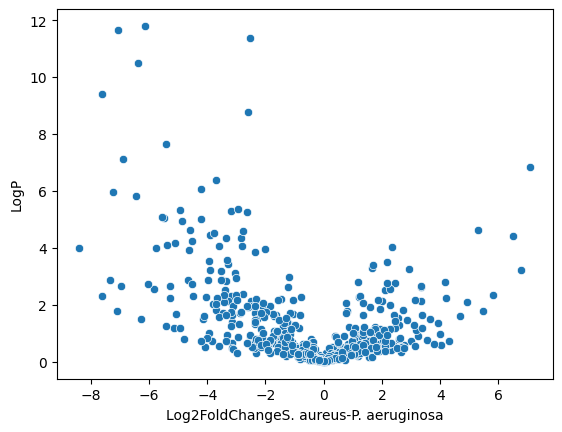

In [6]:
import seaborn as sns
import numpy as np 

df = qm.to_df()
df.to_csv("compared_data.csv", index=False)
df["LogP"] = df["PValuesS. aureus-P. aeruginosa"].apply(lambda x: -np.log10(x))

sns.scatterplot(df, x="Log2FoldChangeS. aureus-P. aeruginosa", y="LogP")

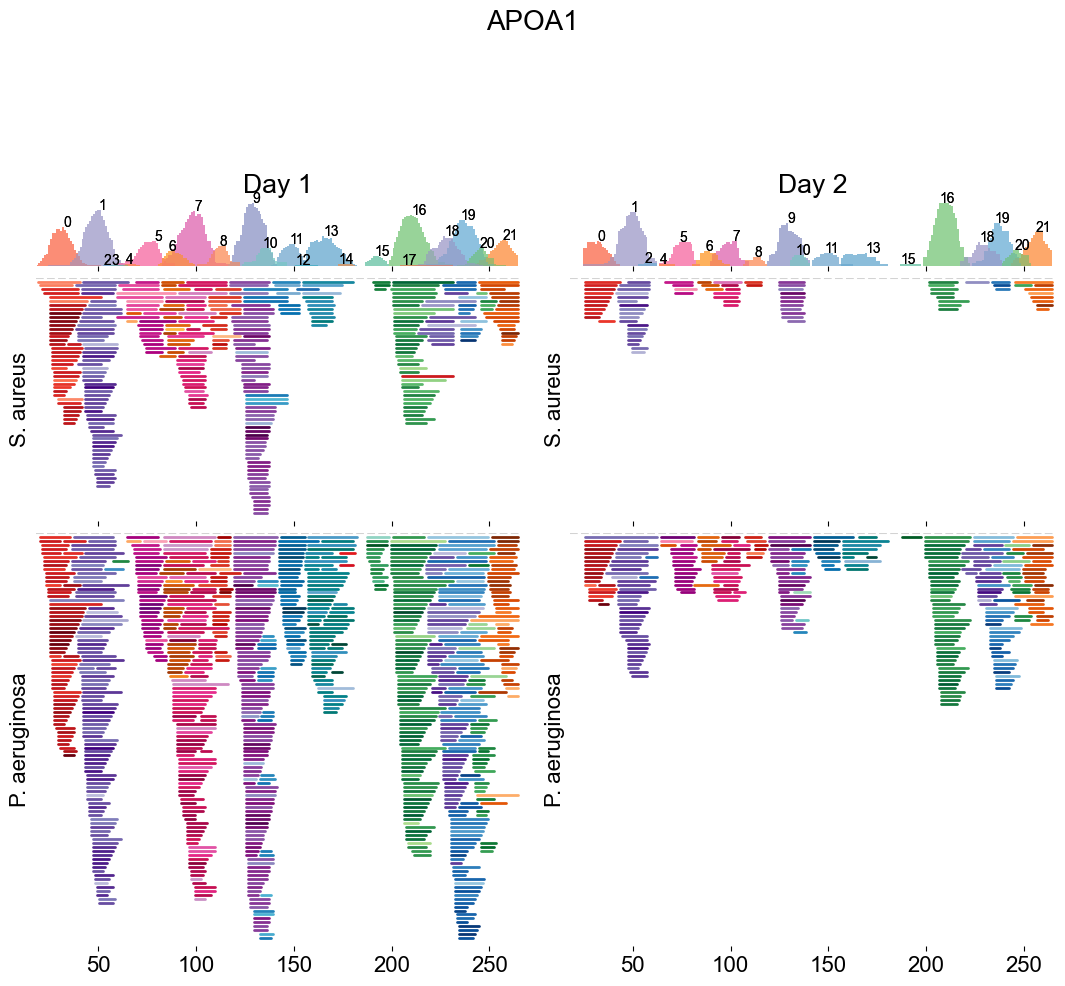

In [7]:
from pepnets.PeptiGrams import PeptiGram


peptigram = PeptiGram(data_matrix, design_matrix)

protein="APOA1"

peptigram.plot_peptigram(
    "APOA1", groups=["S. aureus", "P. aeruginosa"], days=["Day 1", "Day 2"],
    save_str=None
)